In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

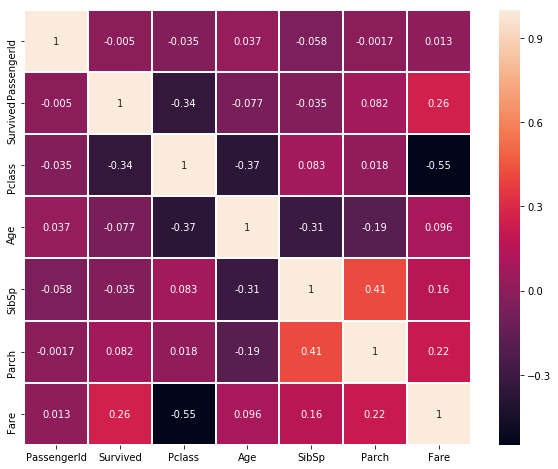

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=1, 
            linecolor='w')

In [6]:
training_data = data[['PassengerId', 'Pclass', 'Fare']]

In [7]:
output_data = data['Survived']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X, x_test, Y, y_test = train_test_split(training_data,
                                       output_data,
                                       test_size=0.3,
                                       random_state=10)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X, Y)

C:\Users\shubhamp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
predictions = model.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
confusion = confusion_matrix(predictions, y_test)

In [16]:
confusion

array([[150,  54],
       [ 24,  40]], dtype=int64)

In [17]:
score = accuracy_score(predictions, y_test)

In [18]:
score

0.7089552238805971

## Importing test data

In [19]:
test_data = pd.read_csv('test.csv')

In [20]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_data = test_data[['PassengerId', 'Pclass', 'Fare']]

In [22]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [23]:
test_data['Fare'] = test_data['Fare'].fillna(10)

In [24]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [25]:
test_predictions = model.predict(test_data)

In [26]:
test_predictions_df = {
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
}

In [27]:
test_predictions_df = pd.DataFrame(test_predictions_df)

In [28]:
test_predictions_df.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [29]:
test_predictions_df = test_predictions_df.
set_index('PassengerId')

SyntaxError: invalid syntax (<ipython-input-29-89526236ebfd>, line 1)

In [ ]:
test_predictions_df.to_csv('new_submission.csv')